# Hw 4.2 Poisson neurons

The Poisson distribution is commonly used to model neural spike counts:
$$p(k) = \frac{μ^k e^{-μ}}{k!} $$,
where k is the spike count (over some specified time interval), and μ is the expected number
of spikes over that interval.

## Part a)

We would like to know what the Poisson distribution looks like. Set the expected num-
ber of spikes to μ = 6 spikes/interval then create a vector p of length 21, whose el-
ements contain the probabilities of Poisson spike counts for k = [0...20]. Since we’re
clipping the range at a maximum value of 20, you’ll need to normalize the vector so it
sums to one (the distribution given above is normalized over the range from 0 to infin-
ity) to make the vector p represent a valid probability distribution. Plot p in a bar plot
and mark the mean firing rate. Is it equal to μ?

In [2]:
import numpy as np
import numpy.linalg as la
import scipy.io as sio
from scipy.stats import poisson
from os.path import dirname, join as pjoin
import matplotlib.pyplot as plt

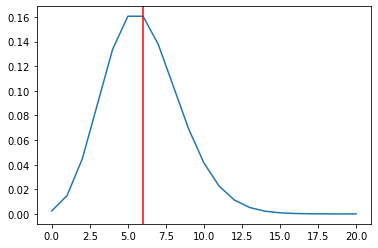

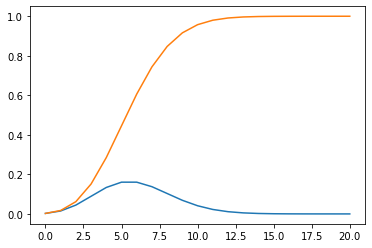

In [3]:
mu = 6 #(spikes/interval)
r = 20
k = np.arange(r+1)
y = np.array(poisson.cdf(k, mu))
p = poisson.pmf(k, mu)
meanP, varP = poisson.stats(mu, moments = 'mv')
plt.figure()
plt.plot(p)
plt.axvline(meanP, color='r')
plt.figure()
plt.plot(p)
plt.plot(y)

The mean and $\mu$ are equal 

## Part b)

Generate samples from the Poisson distribution where each sample represents the num-
ber of spike count ranging from 0 to 20. To simplify the problem, use a clipped Poisson
vector p to write a function samples = randp(p, num) that generates num samples
from the probability distribution function (PDF) specified by p. (Hint: use the rand
2 function, which generates real values over the interval [0...1], and partition this inter-
val into portions proportional in size to the probabilities in p). Test your function by
drawing 1,000 samples from the Poisson distribution in (a), plotting a histogram of how
many times each value is sampled, and comparing this to the frequencies predicted by
p. Verify qualitatively that the answer gets closer (converges) as you increase the num-
ber of samples (try 10 raised to powers [2,3,4,5])

In [5]:
def generateSamplesAndPlot(mu, r, N, plot=False, pltDis=False):
  k = np.arange(r+1)
  p = poisson.pmf(k, mu)
  y = np.array(poisson.cdf(k, mu))
  meanP, varP = poisson.stats(mu, moments = 'mv')
  u = np.random.rand(N)
  bin_width = (k.max() - k.min()) / r
  samples = randp(u, y)
  if plot:
    pltHistAndDist(p, N, k, mu, bin_width, pltDis, samples)

def randp(u, y):
  p_gen_samples = []
  for x in u:
    for i in range(len(y)-1):
      if y[i] < x and x <= y[i+1]:
        p_gen_samples.append(i+1)
        break
      elif 0 < x and x <= y[0]:
        p_gen_samples.append(0)
        break
  return p_gen_samples

def pltHistAndDist(p, N, k, mu, bin_width, pltDis, samples):
  plt.figure()
  plt.hist(samples, k)
  if pltDis:
    plt.plot(p*N*bin_width)
    # plt.axvline(meanP, color='r')
  plt.title(f'mu: {mu}, N: {N}')

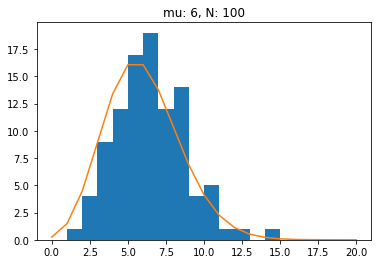

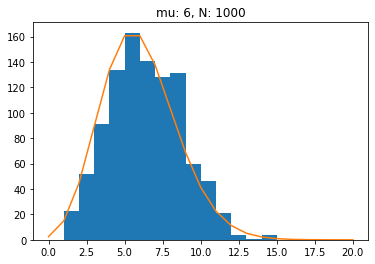

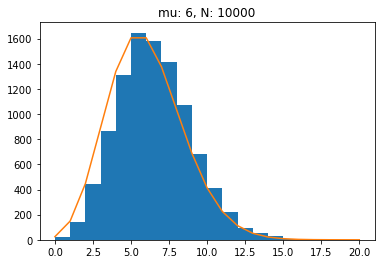

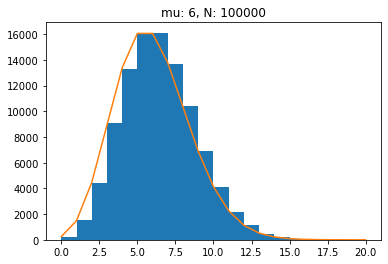

In [7]:
generateSamplesAndPlot(mu=6, r=20, N=10**2, plot=True, pltDis=True)

generateSamplesAndPlot(mu=6, r=20, N=10**3, plot=True, pltDis=True)

generateSamplesAndPlot(mu=6, r=20, N=10**4, plot=True, pltDis=True)

generateSamplesAndPlot(mu=6, r=20, N=10**5, plot=True, pltDis=True)

## Part c)

Imagine you’re recording with an electrode from two neurons simultaneously, whose
spikes have very similar waveforms (and thus can’t be distinguished by the spike sort-
ing software). Create a probability vector, q, for the second neuron, assuming a mean
rate of 4 spikes/interval. What is the PDF of the observed spike counts, which will be
the sum of spike counts from the two neurons derived from p and q? [Hint: the output
vector should have length m + n −1 when m and n are the lengths of the two input
PDFs. This is because the maximum spike count will be bigger than the maximum of
each respective individual neuron.]
Verify your answer by comparing it to the histogram of 1,000 samples generated by
summing two calls to randp (choose a big enough number of samples!).

Text(0.5, 1.0, 'Z with distribution of the convolution')

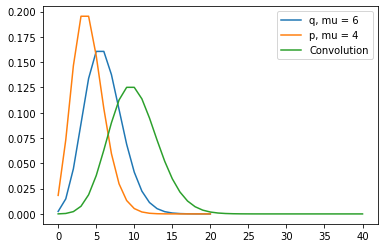

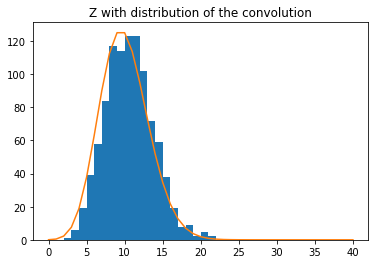

In [9]:
mu1 = 6
mu2 = 4
r = 20
p = poisson.pmf(k, mu1)
q = poisson.pmf(k, mu2)
d = np.convolve(q, p)

plt.figure()
plt.plot(p, label = f'q, mu = {mu1}')
plt.plot(q, label = f'p, mu = {mu2}')
plt.plot(d, label = 'Convolution')
plt.legend()


k = np.arange(r+1)
bin_width = (k.max() - k.min()) / r
N=10**3

#samples with distribution of mu = 6
u1 = np.random.rand(N)
y1 = np.array(poisson.cdf(k, mu1))
X = randp(u1, y1)

#samples with distribution of mu = 4
u2 = np.random.rand(N)
y2 = np.array(poisson.cdf(k, mu2))
Y = randp(u2, y2)

rz=2*r
kz = np.arange(rz+1)

Z = np.add(X,Y)

plt.figure()
plt.hist(Z, kz)
plt.plot(d*N*bin_width)
plt.title('Z with distribution of the convolution')

## Part d)

Now imagine you are recording from a neuron with mean rate 10 spikes/interval (the
sum of the rates from the neurons above). Plot the distribution of spike counts for this
neuron, in comparison with the distribution of the sum of the previous two neurons.
Based on the results of these two experiments, if we record a new spike train, can you
tell whether the spikes you have recorded came from one or two neurons just by looking
at their distribution of spike counts? Comment about the reason why based on the
intuition behind Poisson distribution.

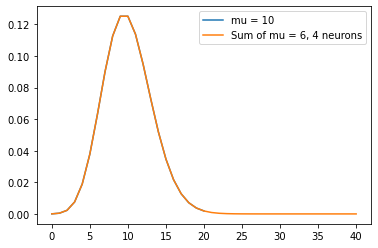

In [10]:
mu = 10
r = 20

t = poisson.pmf(k, mu)

plt.figure()
plt.plot(t, label = f'mu = {mu}')
plt.plot(d, label = f'Sum of mu = {mu1}, {mu2} neurons')
plt.legend()

It is impossible to tell the difference between the two experimental scenarios just by their distribution. This is because a poisson distribution is just measuring how many events occur over a specific time period. Therefore, two sources producing means of 6 and 4 events per interval is indistinguishable from one source producing 10 events per interval. Consider it like a drum line. If two drummers were drumming at different timings, and all you could do is count how many hits of the drum you hear, then the two drummers could be mimicked by a singular drummer hitting a faster more complex beat. Without visual information, it is impossible to tell the one drummer from the two. 